In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

**Loading the data**

In [2]:
dataframe = pd.read_csv('churn.csv')
dataframe.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataframe.columns

# Observation:
    # There are some irrelevant columns such as RowNumber and Surname
    # The target column is Exited


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
dataframe.info()

# Observation
    # The data has 10,000 entries and 14 columns
    # The data has no missing values
    # datatypes: float64(2), int64(9), object(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Statistical summary of the dataset
dataframe.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Visualizatizing customer Churn Distribution**

/tmp/ipykernel_7123/3744247780.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_count.index,


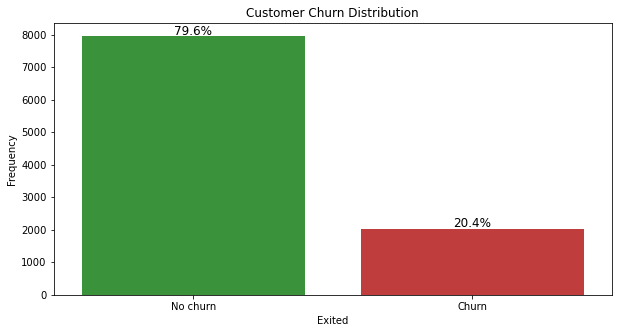

In [7]:
churn_count = dataframe['Exited'].value_counts()

fig, ax = plt.subplots(figsize=(10,5))
color_palette = sns.color_palette()
sns.barplot(x=churn_count.index, 
            y=churn_count.values,
            palette= [color_palette[2], color_palette[3]]
            ).set(
                xticks = range(2),
                xticklabels = ["No churn", "Churn"],
                xlabel = 'Exited',
                ylabel = 'Frequency',
                title = 'Customer Churn Distribution'
             )

# Add percentage labels
total_count = sum(churn_count.values)
for i, count in enumerate(churn_count.values):
    percentage = round(count / total_count * 100, 1)
    ax.text(i, count - 45, f'{percentage}%', ha='center', va='bottom', size=12)
    
# Observation:
    # There is a class imbalance. About 79% of the customers didn't exit
    # while about 20% exited.

**Visualizing gender Distribution**

/tmp/ipykernel_7123/3123468863.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dataframe['Gender'].value_counts().index,


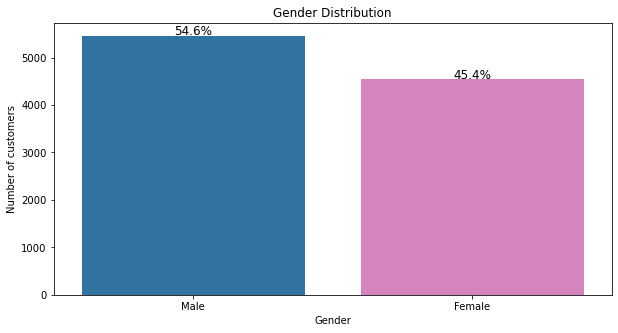

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))
color_palette = sns.color_palette()
sns.barplot(x=dataframe['Gender'].value_counts().index, 
            y=dataframe['Gender'].value_counts().values,
            palette=[color_palette[0], color_palette[6]]
            ).set(
                ylabel = 'Number of customers',
                xlabel = 'Gender',
                title = 'Gender Distribution'
            )

# Add percentage labels
gender_counts = dataframe['Gender'].value_counts()
total_count = sum(gender_counts.values)
for i, count in enumerate(gender_counts.values):
    percentage = round(count / total_count * 100, 1)
    ax.text(i, count - 45, f'{percentage}%', ha='center', va='bottom', size=12)

# Observation:
    # There slightly more males than females

**Visualizing Churn distribution based on gender**

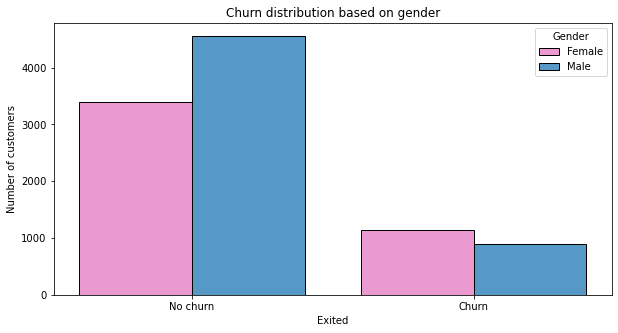

In [10]:
fig, ax = plt.subplots(figsize=(10,5))
color_palette = sns.color_palette()
sns.histplot(data=dataframe, x='Exited', 
             bins=np.arange(3) - 0.5,
             hue='Gender', 
             multiple='dodge',
             shrink=.8,
             legend= True,
             palette=[color_palette[6], color_palette[0]]
             ).set(
                xticks = range(2),
                xticklabels = ["No churn", "Churn"],
                ylabel = 'Number of customers',
                title = 'Churn distribution based on gender'
             );   
# Observation:
 # Slightly more males than females didn't exit which is expected since there were more males in the data
 # Slightly more females than males exited. 

**Visualizing distribution of client ages**

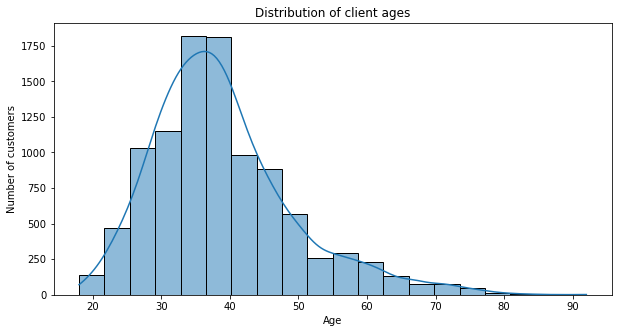

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=dataframe, 
             x ='Age',
             bins=20,
             ax=ax, 
             kde=True
             ).set(
                xlabel = 'Age',
                ylabel = 'Number of customers',
                title = 'Distribution of client ages'
             );
# Observations
    # Majority of the customers are between the ages of 25 to50

**Visualizing Churn distribution based on Age**

In [17]:
# Create age bins. 
bins = [18, 30, 40, 50, 60, 100]  # Define the bin edges
labels = ['18-30', '31-40', '41-50', '51-60', '61+']  # Define the labels for each bin

dataframe['Age Group'] = pd.cut(dataframe['Age'], bins=bins, labels=labels, right=False)

# Print the modified DataFrame
dataframe.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age Group
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,31-40
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,31-40
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,31-40
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,41-50
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,18-30


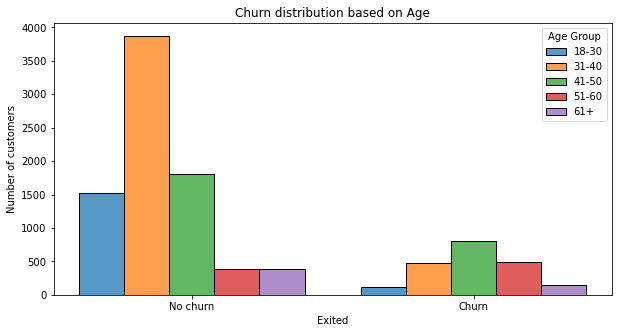

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=dataframe, x='Exited', 
             bins=np.arange(3) - 0.5,
             hue='Age Group', 
             multiple='dodge',
             shrink=.8,
             legend= True
             ).set(
                xticks = range(2),
                xticklabels = ["No churn", "Churn"],
                ylabel = 'Number of customers',
                title = 'Churn distribution based on Age'
             );   
# Observation:
   # Most accounts are owned by people with less than 50 years. Especially 31-40 years
   # Customers of ages 41-50 have the highest churn rate

# **Data Preparation**

**Removing irrelevant columns**

In [20]:
dataframe.drop(['RowNumber', 'Surname', 'Age Group'], axis=1, inplace=True)
dataframe.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

**Checking for duplicate values using the 'CustomerId' column**

In [21]:
dataframe['CustomerId'].duplicated(keep=False).sum()

    # The dataset does not have duplicates

0

In [26]:
cont_cols = [i for i in dataframe.columns if dataframe[i].dtype in ['float64', 'int64']]
cont_cols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

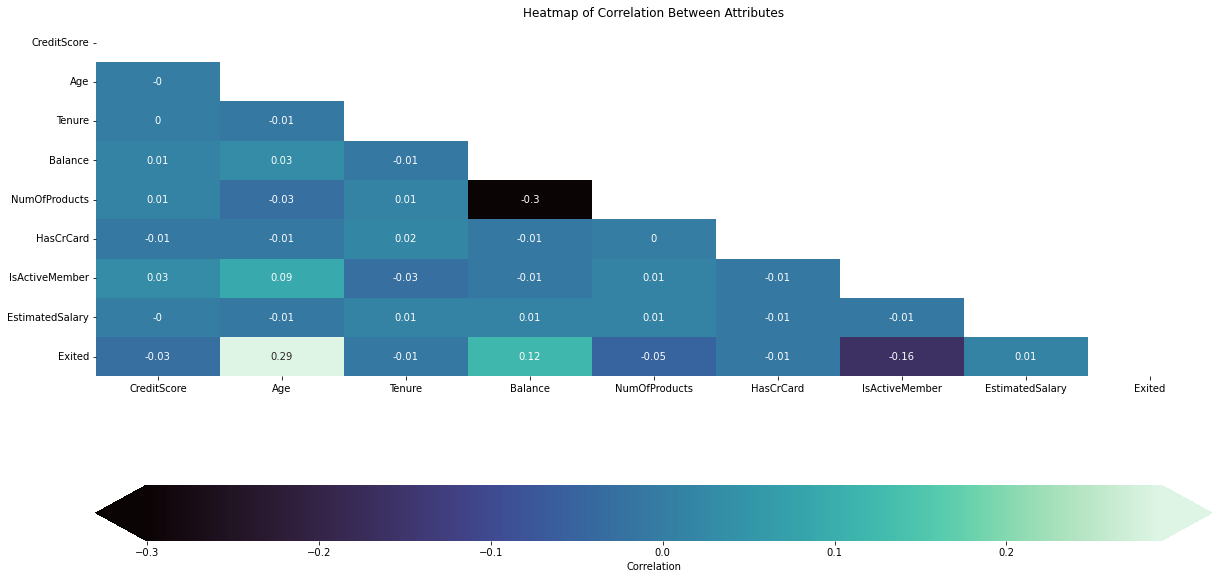

In [29]:
# df with the correlation matrix
corr = round(dataframe[cont_cols].corr(), 2)

# Setting up the figure and axes
fig, ax = plt.subplots(figsize=(20,10))

# Plotting a heatmap of the correlation matrix(train_corr), with both numbers and colors indicating the correlations
sns.heatmap(
    # Specifying the data to be plotted
    data = corr,

    # The mask is used to ensure duplicates are not shown
    mask=np.triu(np.ones_like(corr, dtype=bool)),

    # Specifying the that the existing axes (ax) should be used
    ax=ax,
    
    # Specifying that the labels should be shown too.
    annot=True,
     
    # Customizing the  colorbar appearance
    cmap="mako",
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
    
)
# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes");

# Observation:
    # There is not multicolinearity

**Checking for outliers**

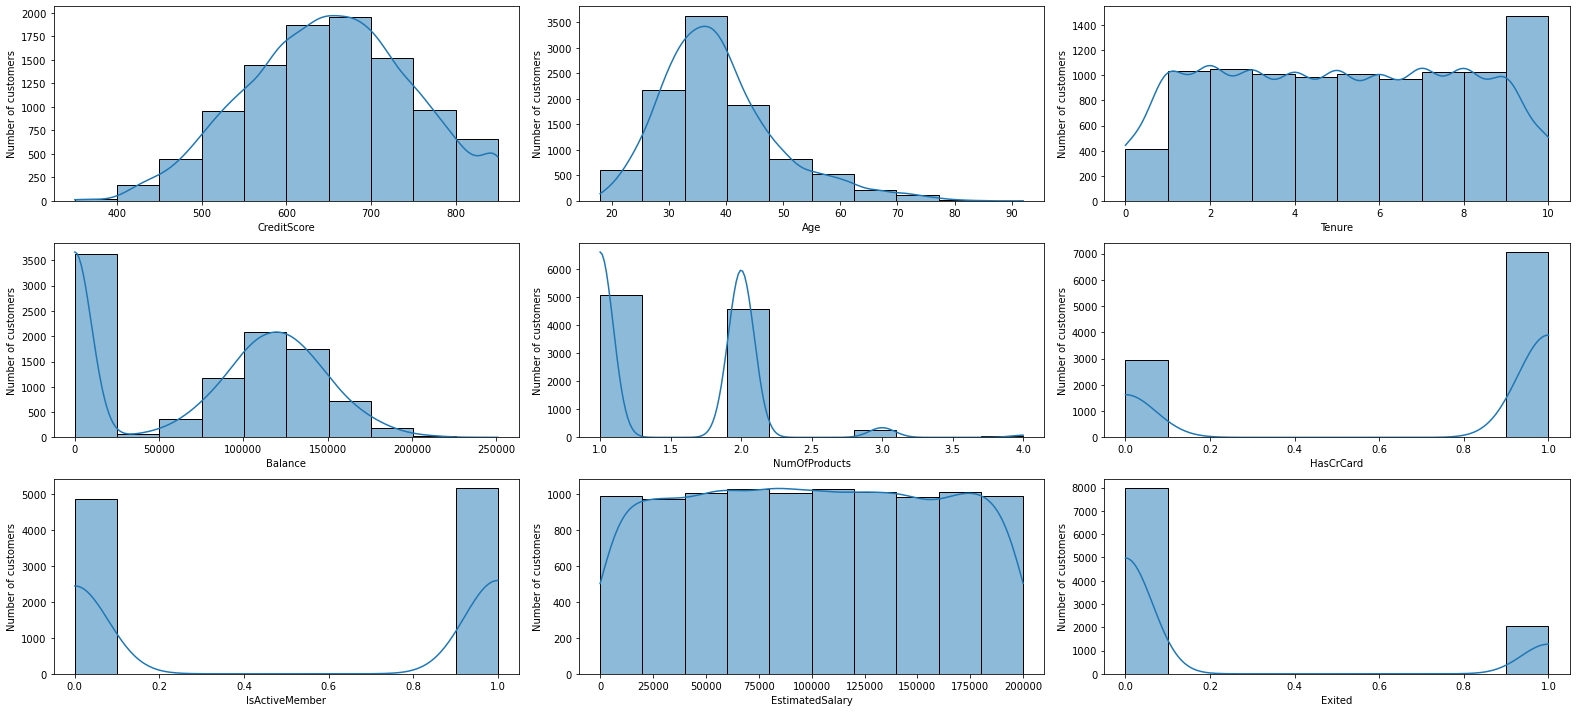

In [32]:
    
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(22,10))
for i, col in enumerate(cont_cols):
     ax = axes[i//3][i%3]
     sns.histplot(dataframe[col], bins=10 ,kde=True, ax=ax)
     ax.set_xlabel(col)
     ax.set_ylabel("Number of customers")
fig.set_tight_layout(True);

# Observation:
     # The data has no outliers

**Converting categorical columns to numerical**

In [35]:
[i for i in dataframe.columns if dataframe[i].dtype in ['O']]

['Geography', 'Gender']

In [36]:
# For gender, we can give 1 for male and 0 for female
dataframe['Gender'] = dataframe['Gender'].replace({'Male': 1, 'Female':0})
dataframe['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [37]:
# For Geography, we can represent France with 1, Spain with 2 and Germany with 3

dataframe['Geography'] = dataframe['Geography'].replace({'France': 1, 'Spain':2, 'Germany':3})
dataframe['Geography'].value_counts()

1    5014
3    2509
2    2477
Name: Geography, dtype: int64

In [38]:
# Confirming all datatype are numerical
dataframe.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

**Train Test Split**

In [39]:
# The values
X = dataframe.drop('Exited', axis=1)

# The target column(label)
y = dataframe['Exited']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Modelling**

In [43]:
#Models to be tested
models = { 'Model' : ['Baseline Decision Tree', 'Second Decision Tree', 'logistic regression',
                      'KNeighborsClassifier', 'Baseline Random Forest Classifier', 'XGBoost Classifier',
                      'Random Forest Classifier-Grid Search','Final Model-Random Forest Classifier'],
          'Train Accuracy Score(%)': [0, 0, 0, 0, 0, 0, 0, 0],
          'Test Accuracy Score(%)': [0, 0, 0, 0, 0, 0, 0, 0]}

#Dataframe holding the model names and accuracy score
dataframe_model_results = pd.DataFrame(models, columns=['Model','Train Accuracy Score(%)', 'Test Accuracy Score(%)'])

#Function to fill the dataframe holding model names and accuracy score
def model_results(model_type,y_train, y_train_pred, y_test, y_test_pred):
  index_val = dataframe_model_results[dataframe_model_results['Model']==model_type].index

  dataframe_model_results.loc[index_val, 'Train Accuracy Score(%)'] = round(accuracy_score(y_train, y_train_pred), 2)*100
  df_model_results.loc[index_val, 'Test Accuracy Score(%)'] = round(accuracy_score(y_test, y_test_pred), 2)*100

  return dataframe_model_results

**i. Decision Tree Classifier**

In [45]:
baseline_decision_tree = DecisionTreeClassifier(random_state=42)
baseline_decision_tree.fit(X_train, y_train)

y_test_pred = baseline_decision_tree.predict(X_test)
y_train_pred = baseline_decision_tree.predict(X_train)

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
dataframe_model_results('Baseline Decision Tree',y_train, y_train_pred, y_test, y_test_pred)

# Observation:
    # The model is overfitting. 
    # Customers who churned are not being predicted accurately, the precision score is much lower when compared to 
    # customers who did not churn.

*********************************************************************
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1607
           1       0.45      0.50      0.47       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.79      2000

*********************************************************************


TypeError: 'DataFrame' object is not callable

> **Solving the class imbalance issue observed earlier**

In [46]:
ros = RandomOverSampler(random_state=42)

X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

y_train_resampled.value_counts()

0    6356
1    6356
Name: Exited, dtype: int64

**Fitting decision tree model again after removing the class imbalance and performing feature selection**

In [48]:
second_decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
second_decision_tree.fit(X_train_resampled, y_train_resampled)

y_test_pred = second_decision_tree.predict(X_test)
y_train_pred = second_decision_tree.predict(X_train_resampled)

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
dataframe_model_results('Second Decision Tree', y_train_resampled, y_train_pred, y_test, y_test_pred)
#Observations:
# The second model is still overfitting. However, it has improved slightly.

*********************************************************************
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1607
           1       0.48      0.49      0.48       393

    accuracy                           0.80      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.80      0.80      0.80      2000

*********************************************************************


TypeError: 'DataFrame' object is not callable

**ii. logistic regression**

In [50]:
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)

y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train_resampled)

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
dataframe_model_results('logistic regression', y_train_resampled, y_train_pred, y_test, y_test_pred)
#Observations:

# This model is underfitting. It does not perform very well in both the train and test set

*********************************************************************
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1607
           1       0.38      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.81      0.72      0.74      2000

*********************************************************************


TypeError: 'DataFrame' object is not callable

**iii. KNeighborsClassifier**

In [51]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_resampled, y_train_resampled)

y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train_resampled)

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
dataframe_model_results('KNeighborsClassifier', y_train_resampled, y_train_pred, y_test, y_test_pred)
#Observations:

# This model is overfitting and does not perform very well in the test set when compared to the others

*********************************************************************
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1607
           1       0.40      0.56      0.47       393

    accuracy                           0.75      2000
   macro avg       0.64      0.68      0.65      2000
weighted avg       0.79      0.75      0.76      2000

*********************************************************************


NameError: name 'df_model_results' is not defined

**iv. Random Forest Model**

In [53]:
baseline_random_forest = RandomForestClassifier(random_state=123)
baseline_random_forest.fit(X_train_resampled, y_train_resampled)

y_test_pred = baseline_random_forest.predict(X_test)
y_train_pred = baseline_random_forest.predict(X_train_resampled)

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
dataframe_model_results('Baseline Random Forest Classifier', y_train_resampled, y_train_pred, y_test, y_test_pred)

# Observation:
    # This is the best performing model so far with an accuracy of 86 and a precision score of 0.68

*********************************************************************
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1607
           1       0.68      0.54      0.60       393

    accuracy                           0.86      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000

*********************************************************************


TypeError: 'DataFrame' object is not callable

In [ ]:
final_model = RandomForestClassifier(criterion = 'gini', max_depth=32, min_samples_leaf=1, min_samples_split=2, n_estimators=500, random_state=42)
final_model.fit(X_train_resampled, y_train_resampled)

y_test_pred = final_model.predict(X_test)
y_train_pred = final_model.predict(X_train_resampled)

print('*********************************************************************')
print(classification_report(y_test, y_test_pred))

print('*********************************************************************')
model_results('Final Model-Random Forest Classifier', y_train_resampled, y_train_pred, y_test, y_test_pred)

**Visualizing the feature importance of the final model**

In [56]:
def plot_feature_importance(model):
    features = X.columns
    importances = np.sort(model.feature_importances_)
    indices = np.argsort(importances)
    num_features = 5
    
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.barplot(x=importances[indices[-num_features:]], y=[features[i] for i in indices[-num_features:]], ax=ax)
    ax.invert_yaxis()
    ax.set_xlabel('Importance')
    ax.set_ylabel('Features')
    ax.set_title('Feature Importance')